In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df  = pd.read_csv('downloads/Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [11]:
df.drop(['day','month','year'],axis = 1,inplace = True)

KeyError: "['day', 'month', 'year'] not found in axis"

In [12]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [13]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [16]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [18]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [19]:
X = df.drop('FWI',axis = 1)
y = df['FWI']

In [20]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [21]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75, random_state = 42)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [26]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

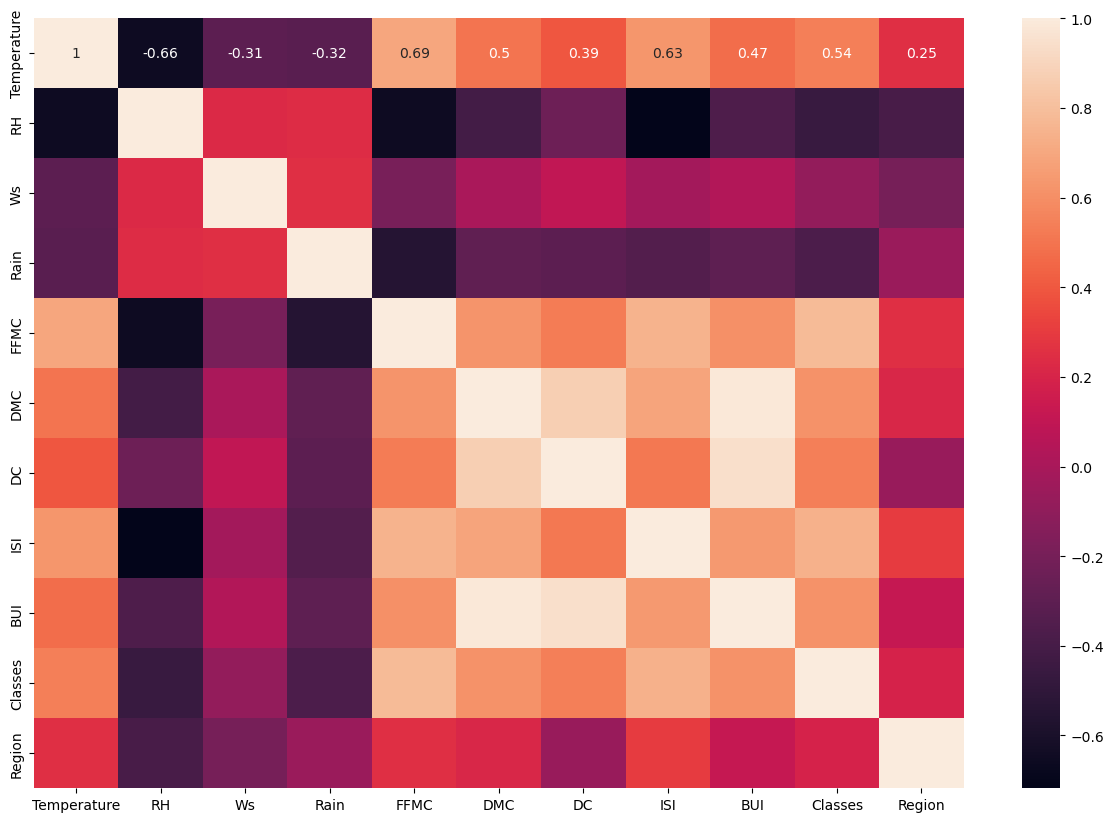

In [30]:
plt.figure(figsize = (15,10))
corr = X_train.corr()
sns.heatmap(corr,annot = True)

In [ ]:
def corr(df,threshold):
    for i in df.columns:
    

In [31]:
def corr_data(df,threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i): 
            if abs(corr_matrix.iloc[i,j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [33]:
corr_features = corr_data(X_train,0.85)

In [34]:
corr_features

{'BUI', 'DC'}

In [36]:
X_train.drop(corr_features, axis = 1, inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True) 
X_train.shape,X_test.shape


((182, 9), (61, 9))

# Feature Scaling or Standardization 

In [38]:
from sklearn.preprocessing import StandardScaler 

In [39]:
scaler = StandardScaler()

In [44]:
X_train = scaler.fit_transform(X_train)

In [45]:
X_test = scaler.transform(X_test)

In [46]:
X_train

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Linear Regression Model

mae and r2_score 0.5468236465249976 0.9847657384266951


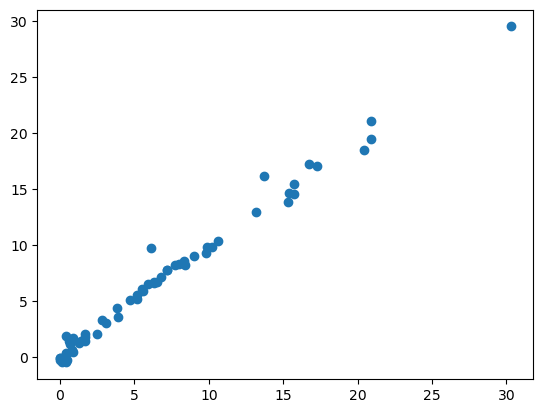

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae and r2_score",mae,score)
plt.scatter(y_test,y_pred)

mae and r2_score 1.1331759949144085 0.9492020263112388


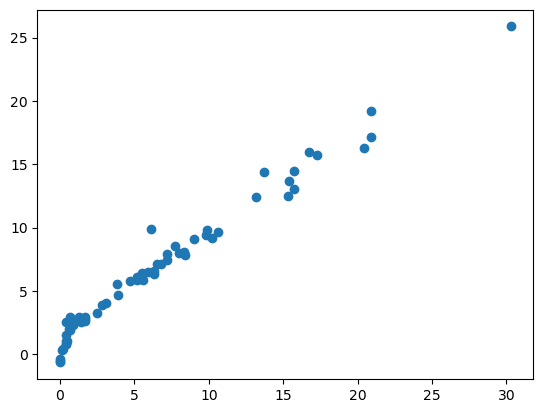

In [57]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regressor = Lasso()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae and r2_score",mae,score)
plt.scatter(y_test,y_pred)

## Cross Validation Lasso


what Exactly is cross validation

Train and Test

Train  = Train and Validation 

Validation data is used for hyper parameter tuning. 

What is hyper parameter tuning

If CV = 5 which means the data will be divided in 5 groups. 
and 5 iterations will be made
for example in a 1000 values dataset 5  group of 200 will be made and 
CV = 1 in first iterations 200 will be validation and next 800 will be for training 
CV = 2 next 200 for validation and remaining will be for training 

all the accuracy for these 5 iterations will be measured and avg of these accuracy will be model accuracy. 
                        
                                                                                                                                     
                                                                                                                                     

In [61]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train,y_train)

LassoCV(cv=5)

In [62]:
lassocv.alpha_

0.05725391318234405

In [63]:
lassocv.alphas_

array([7.05853002e+00, 6.58280872e+00, 6.13914944e+00, 5.72539132e+00,
       5.33951911e+00, 4.97965339e+00, 4.64404142e+00, 4.33104857e+00,
       4.03915039e+00, 3.76692517e+00, 3.51304702e+00, 3.27627941e+00,
       3.05546914e+00, 2.84954075e+00, 2.65749124e+00, 2.47838523e+00,
       2.31135036e+00, 2.15557308e+00, 2.01029467e+00, 1.87480753e+00,
       1.74845178e+00, 1.63061198e+00, 1.52071419e+00, 1.41822315e+00,
       1.32263965e+00, 1.23349817e+00, 1.15036452e+00, 1.07283380e+00,
       1.00052839e+00, 9.33096128e-01, 8.70208572e-01, 8.11559427e-01,
       7.56863037e-01, 7.05853002e-01, 6.58280872e-01, 6.13914944e-01,
       5.72539132e-01, 5.33951911e-01, 4.97965339e-01, 4.64404142e-01,
       4.33104857e-01, 4.03915039e-01, 3.76692517e-01, 3.51304702e-01,
       3.27627941e-01, 3.05546914e-01, 2.84954075e-01, 2.65749124e-01,
       2.47838523e-01, 2.31135036e-01, 2.15557308e-01, 2.01029467e-01,
       1.87480753e-01, 1.74845178e-01, 1.63061198e-01, 1.52071419e-01,
      

0.6199701158263433 0.9820946715928275


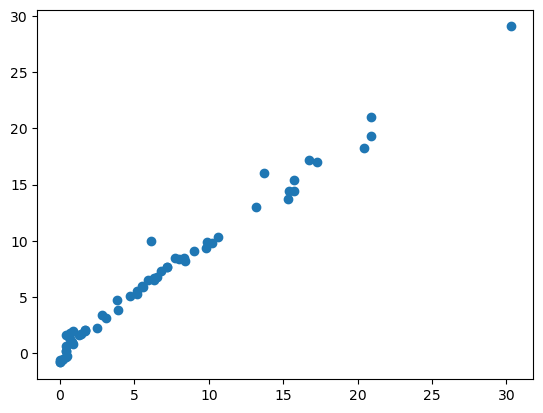

In [65]:
y_pred = lassocv.predict(X_test)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mae,score)

### Ridge Regression 

mae and r2_score 0.5642305340105693 0.9842993364555513


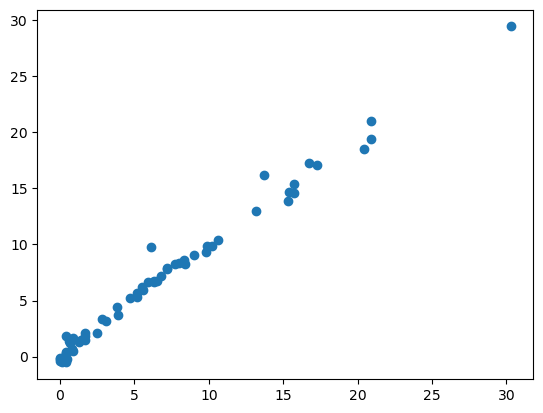

In [75]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regressor = Ridge()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae and r2_score",mae,score)
plt.scatter(y_test,y_pred)

mae and r2_score 0.5642305340105693 0.9842993364555513


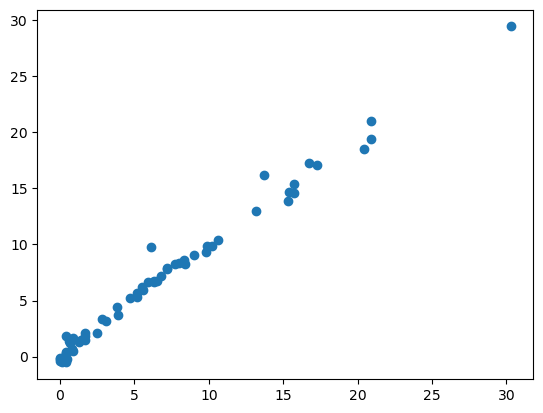

In [67]:
from sklearn.linear_model import RidgeCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regressor = RidgeCV(cv = 5)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae and r2_score",mae,score)
plt.scatter(y_test,y_pred)

In [68]:
regressor.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

mae and r2_score 1.8822353634896 0.8753460589519703


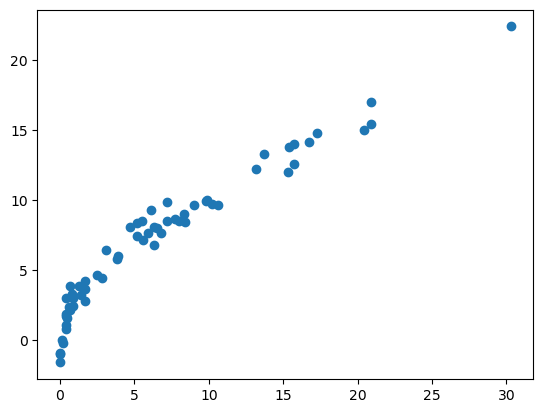

In [71]:
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regressor = ElasticNet()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae and r2_score",mae,score)
plt.scatter(y_test,y_pred)

######### Pickling Method

In [72]:
# Pickle the machine learning models, preprocessing model standardscaler

In [73]:
scaler

StandardScaler()

In [77]:
ridge = regressor

In [79]:
ridge

Ridge()

In [81]:
import pickle 
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))